In [ ]:
#Using this data, build a regression model to predict property crimes. 
#You can use the features you prepared in the previous assignment, new features of your own choosing, 
#or a combination. The goal here is prediction rather than understanding mechanisms, so the focus 
#is on creating a model that explains a lot of variance.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from sklearn import linear_model
import statsmodels.formula.api as smf
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls",skiprows=4,na_filter=False)

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,,30,227,526,4090,705,3243,142,
4,Albion Village,6388,23,0,,3,4,16,223,53,165,5,


In [4]:
#check column output make sure it dosn't have funny character values
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
#remove newlines from the columns
df.columns = [x.strip().replace('\n', ' ') for x in df.columns]

In [6]:
#check to make sure the newline is removed from the columns
df.columns

Index(['City', 'Population', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)1',
       'Rape (legacy definition)2', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny- theft', 'Motor vehicle theft',
       'Arson3'],
      dtype='object')

In [7]:
#remove newlines from the rows of data frame
df.apply(lambda x: str(x).strip('\\n'))

City                                    0                                          Ada...
Population                              0        1861\n1        2577\n2        2846\n3...
Violent crime                           0         0\n1         3\n2         3\n3      ...
Murder and nonnegligent manslaughter    0      0\n1      0\n2      0\n3      8\n4     ...
Rape (revised definition)1              0       \n1       \n2       \n3       \n4     ...
Rape (legacy definition)2               0       0\n1       0\n2       0\n3      30\n4 ...
Robbery                                 0        0\n1        0\n2        0\n3      227...
Aggravated assault                      0        0\n1        3\n2        3\n3      526...
Property crime                          0        12\n1        24\n2        16\n3      ...
Burglary                                0        2\n1        3\n2        1\n3      705...
Larceny- theft                          0        10\n1        20\n2        15\n3      ...
Motor vehi

In [8]:
#remove blank lines in the file by confirming rows with data
data = df.iloc[0:347]

In [9]:
#dataframe contains both predictive and outcome variable
data = data[['Population', 'Robbery','Murder and nonnegligent manslaughter', 'Property crime']]

In [10]:
#show the dataframe
#data

In [11]:
#All columns in the table are strings convert to number
data2 = data.astype('float64', copy=True, errors='raise')

In [12]:
#Drill wants one of the predictive variables to be squared
data2['Population squared'] = np.square(data.Population)

In [13]:
#show the dataframe
#data2

In [14]:
#add column = 0 or 1
data2['Unnamed'] = np.where(data2['Property crime']>0, 1, 0)

In [16]:
data2 = data2[['Population', 'Population squared','Robbery','Murder and nonnegligent manslaughter','Unnamed', 'Property crime']]
data2.head()

,Population,Population squared,Robbery,Murder and nonnegligent manslaughter,Unnamed,Property crime
0,1861.000,3463321,0.000,0.000,1,12.000
1,2577.000,6640929,0.000,0.000,1,24.000
2,2846.000,8099716,0.000,0.000,1,16.000
3,97956.000,9595377936,227.000,8.000,1,4090.000
4,6388.000,40806544,4.000,0.000,1,223.000


In [73]:
#show the correlation to determine if the variables are independent.
data2.corr()

,Population,Robbery,Murder and nonnegligent manslaughter,Property crime
Population,1.000,0.998,0.987,0.996
Robbery,0.998,1.000,0.993,0.998
Murder and nonnegligent manslaughter,0.987,0.993,1.000,0.995
Property crime,0.996,0.998,0.995,1.000


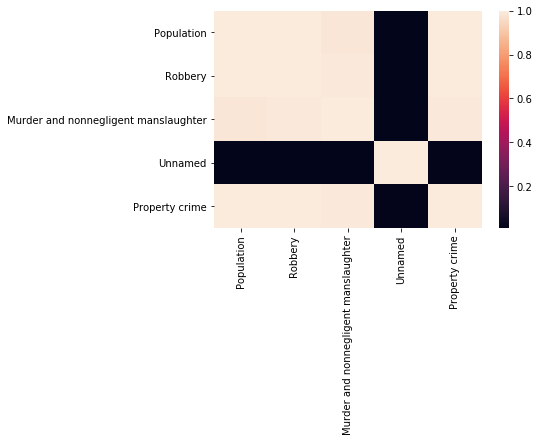

In [18]:
#show the correlation visually
sns.heatmap(data2.corr())

In [79]:
# Sample data to play with.
#y = data2['Population squared'].values.reshape(-1, 1)
x = data2[['Population','Population squared','Robbery','Murder and nonnegligent manslaughter']]
y = data2['Property crime'].values.reshape(-1, 1)
#x = data2['Population']

#plt.scatter(x, y)

In [80]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

display(data2.head())

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x, y))

# Plot outputs
#plt.scatter(x, y, color='black')
#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.show()

,Population,Population squared,Robbery,Murder and nonnegligent manslaughter,Property crime
0,1861.000,3463321,0.000,0.000,12.000
1,2577.000,6640929,0.000,0.000,24.000
2,2846.000,8099716,0.000,0.000,16.000
3,97956.000,9595377936,227.000,8.000,4090.000
4,6388.000,40806544,4.000,0.000,223.000


Coefficients: 
 [[ 1.60066283e-02 -1.01347161e-09  2.06237926e+00  1.17795475e+02]]
Intercept: 
 [24.00754138]

R-squared:
0.9987455218601726


In [ ]:
#R2 shows how much variance in the outcome variable our model was able to explain. 
#however, given it is a high value it indicates we have more overfitting in our data

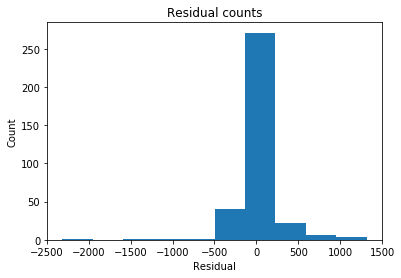

In [82]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = data2['Property crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning as the data is slightly skewed to the right
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

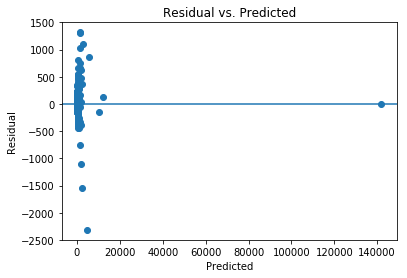

In [83]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()